In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
df_date = pd.read_csv('dim_date.csv')
df_bookings = pd.read_csv('fact_bookings.csv')
df_hotels = pd.read_csv('dim_hotels.csv')
df_rooms = pd.read_csv('dim_rooms.csv')
df_agg_bookings = pd.read_csv('fact_aggregated_bookings.csv')

In [33]:
df_bookings.sample(10)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
41094,May282218561RT110,18561,24-05-22,28-05-22,29-05-22,3.0,RT1,logtrip,NaN,Cancelled,7150,2860
90831,Jul012219562RT27,19562,27-06-22,1/7/2022,3/7/2022,1.0,RT2,journey,5.0,Checked Out,13500,13500
130210,Jul292216559RT310,16559,23-07-22,29-07-22,30-07-22,2.0,RT3,journey,NaN,No Show,20400,20400
24738,May172216558RT14,16558,14-05-22,17-05-22,19-05-22,4.0,RT1,others,5.0,Checked Out,10920,10920
24998,May172217558RT13,17558,15-05-22,17-05-22,22-05-22,2.0,RT1,others,NaN,Cancelled,11050,4420
27358,May192217559RT218,17559,17-05-22,19-05-22,24-05-22,2.0,RT2,tripster,5.0,Checked Out,15300,15300
56904,Jun082219559RT212,19559,3/6/2022,8/6/2022,13-06-22,2.0,RT2,logtrip,NaN,Cancelled,13500,5400
86862,Jun292216559RT45,16559,8/6/2022,29-06-22,4/7/2022,2.0,RT4,tripster,NaN,Cancelled,32300,12920
92976,Jul032216558RT28,16558,12/6/2022,3/7/2022,7/7/2022,2.0,RT2,others,5.0,Checked Out,12600,12600
116453,Jul172219563RT26,19563,17-07-22,17-07-22,21-07-22,1.0,RT2,journey,3.0,Checked Out,13500,13500


In [29]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134573 entries, 1 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 13.3+ MB


In [4]:
df_bookings.isna().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                3
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

C:\Users\abhin\AppData\Local\Temp\ipykernel_22916\1686980109.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_bookings['no_guests'])


<Axes: xlabel='no_guests', ylabel='Density'>

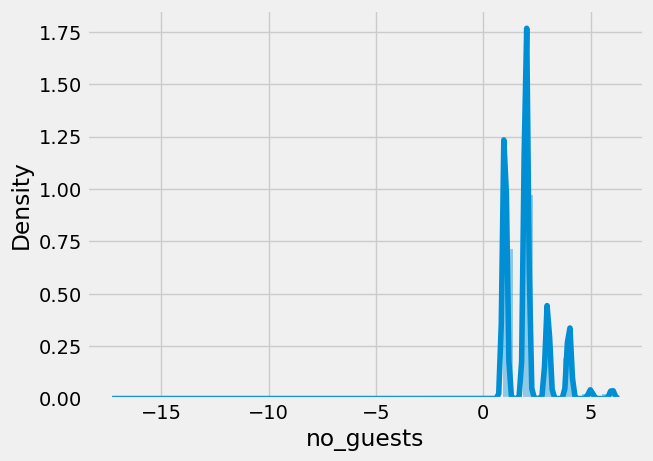

In [5]:
sns.distplot(df_bookings['no_guests'])

In [8]:
df_bookings[df_bookings['no_guests']<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [9]:
df_bookings=df_bookings[df_bookings['no_guests']>0]

C:\Users\abhin\AppData\Local\Temp\ipykernel_22916\1686980109.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_bookings['no_guests'])


<Axes: xlabel='no_guests', ylabel='Density'>

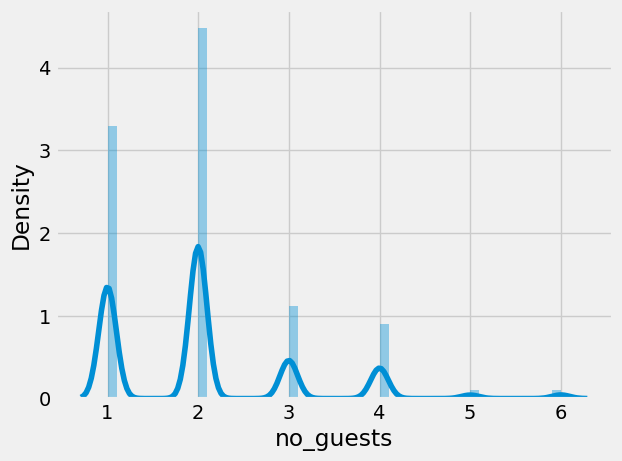

In [11]:
sns.distplot(df_bookings['no_guests'])

In [12]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134578.000000,134578.000000,56679.000000,1.345780e+05,134578.000000
mean,18061.143315,2.036744,3.619048,1.537804e+04,12696.011822
std,1093.053454,1.031710,1.234970,9.304015e+04,6927.841641
min,16558.000000,1.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [14]:
df_bookings['revenue_generated'].max(),df_bookings['revenue_generated'].min()

(28560000, 6500)

C:\Users\abhin\AppData\Local\Temp\ipykernel_22916\3870311795.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_bookings['revenue_generated'])


<Axes: xlabel='revenue_generated', ylabel='Density'>

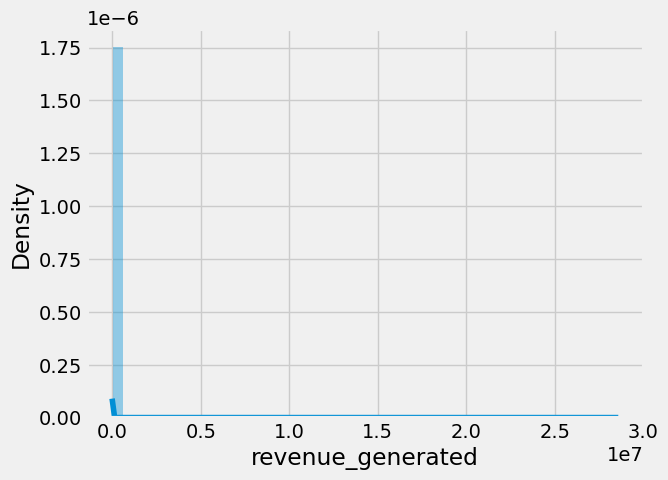

In [20]:
sns.distplot(df_bookings['revenue_generated'])


In [15]:
avg,std=df_bookings['revenue_generated'].mean(),df_bookings['revenue_generated'].std()

In [16]:
Upper_limit=avg+std*3
Lower_limit=avg-std*3

In [21]:
df_bookings=df_bookings[df_bookings['revenue_generated']<Upper_limit]

C:\Users\abhin\AppData\Local\Temp\ipykernel_22916\3870311795.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_bookings['revenue_generated'])


<Axes: xlabel='revenue_generated', ylabel='Density'>

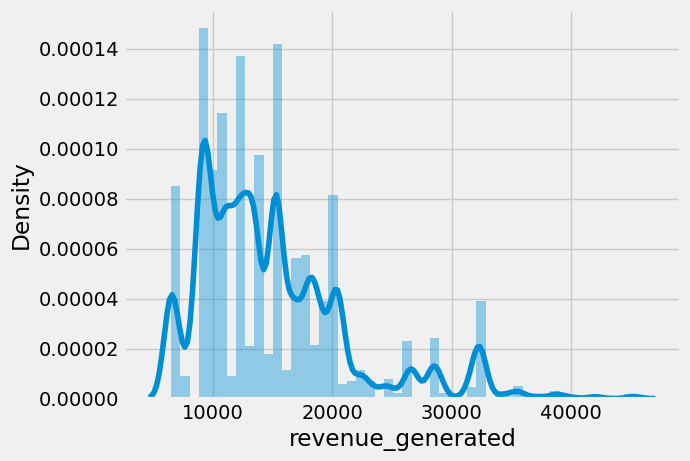

In [23]:
sns.distplot(df_bookings['revenue_generated'])


In [26]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [44]:
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


In [45]:
df_agg_bookings.describe()

,property_id,successful_bookings,capacity
count,9200.000000,9200.000000,9198.000000
mean,18040.640000,14.655761,25.280496
std,1099.818325,7.736170,11.442080
min,16558.000000,1.000000,3.000000
25%,17558.000000,9.000000,18.000000
50%,17564.000000,14.000000,25.000000
75%,18563.000000,19.000000,34.000000
max,19563.000000,123.000000,50.000000


In [46]:
df_agg_bookings['Occupancy Rate']=df_agg_bookings['successful_bookings']/df_agg_bookings['capacity']

In [50]:
df_agg_bookings['Occupancy Rate']=df_agg_bookings['Occupancy Rate'].apply(lambda x:round(x*100,2))

In [51]:
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,Occupancy Rate
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.22
9196,16559,31-Jul-22,RT4,13,18.0,72.22
9197,17558,31-Jul-22,RT4,3,6.0,50.00
9198,19563,31-Jul-22,RT4,3,6.0,50.00


In [58]:
df_agg_bookings['Occupancy Rate'].describe()

count    9198.000000
mean       58.398338
std        16.064498
min        21.050000
25%        47.370000
50%        56.250000
75%        66.670000
max       473.080000
Name: Occupancy Rate, dtype: float64

In [60]:
df_agg_bookings[df_agg_bookings['Occupancy Rate']>101]

,property_id,check_in_date,room_category,successful_bookings,capacity,Occupancy Rate
3,17558,1-May-22,RT1,30,19.0,157.89
12,16563,1-May-22,RT1,100,41.0,243.90
4136,19558,11-Jun-22,RT2,50,39.0,128.21
6209,19560,2-Jul-22,RT1,123,26.0,473.08
8522,19559,25-Jul-22,RT1,35,24.0,145.83
9194,18563,31-Jul-22,RT4,20,18.0,111.11


In [61]:
df_agg_bookings=df_agg_bookings[df_agg_bookings['Occupancy Rate']<101]

In [62]:
df_agg_bookings.describe()

,property_id,successful_bookings,capacity,Occupancy Rate
count,9192.000000,9192.000000,9192.000000,9192.000000
mean,18040.405135,14.625870,25.278829,58.299379
std,1099.799117,7.590361,11.443295,15.265380
min,16558.000000,1.000000,3.000000,21.050000
25%,17558.000000,9.000000,18.000000,47.370000
50%,17564.000000,14.000000,25.000000,56.250000
75%,18563.000000,19.000000,34.000000,66.670000
max,19563.000000,43.000000,50.000000,100.000000


In [86]:
df_agg_bookings=pd.merge(df_rooms,df_agg_bookings,left_on='room_id',right_on='room_category')

In [95]:
df_agg_bookings.groupby(by='room_class_y')['Occupancy Rate'].mean()

room_class_y
Elite           58.009756
Premium         58.028213
Presidential    59.277925
Standard        57.880828
Name: Occupancy Rate, dtype: float64

In [99]:
df_Occupancy_rate_percity=pd.merge(df_hotels,df_agg_bookings,on='property_id')

In [101]:
df_Occupancy_rate_percity.groupby('city')['Occupancy Rate'].mean()

city
Bangalore    56.332376
Delhi        61.507341
Hyderabad    58.120652
Mumbai       57.902319
Name: Occupancy Rate, dtype: float64

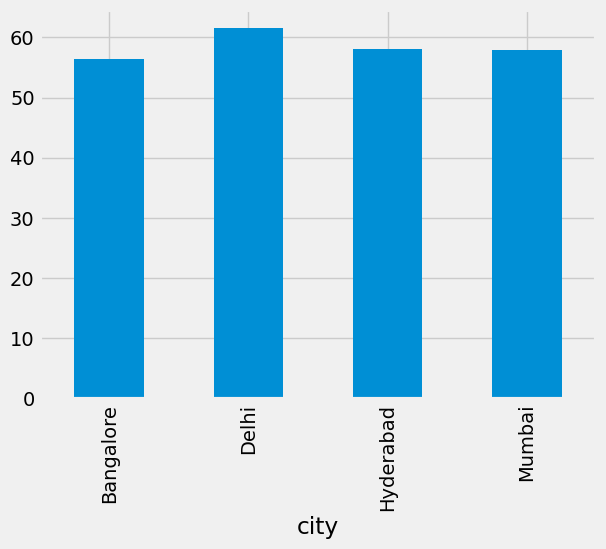

In [110]:
df_Occupancy_rate_percity.groupby('city')['Occupancy Rate'].mean().plot(kind='bar')
plt.show()

In [111]:
df_Occupancy_rate_percity=pd.merge(df_Occupancy_rate_percity,df_date,left_on='check_in_date',right_on='date')

In [146]:
df_Occupancy_rate_percity.groupby('day_type')['Occupancy Rate'].mean() 

day_type
weekeday    50.883140
weekend     72.343625
Name: Occupancy Rate, dtype: float64

<Axes: ylabel='Occupancy Rate'>

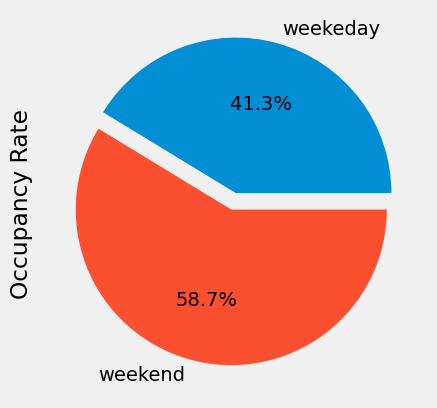

In [162]:
df_Occupancy_rate_percity.groupby('day_type')['Occupancy Rate'].mean().plot(kind='pie',autopct='%1.1f%%', radius=1.0, explode=[0.07, 0.04])

In [166]:
df_rev=pd.merge(df_bookings,df_hotels,on='property_id')

In [172]:
df_rev.groupby('city')['revenue_realized'].mean().sort_values(ascending=False)

city
Mumbai       15386.386150
Bangalore    13130.830861
Delhi        12153.923461
Hyderabad     9321.999541
Name: revenue_realized, dtype: float64

<Axes: ylabel='city'>

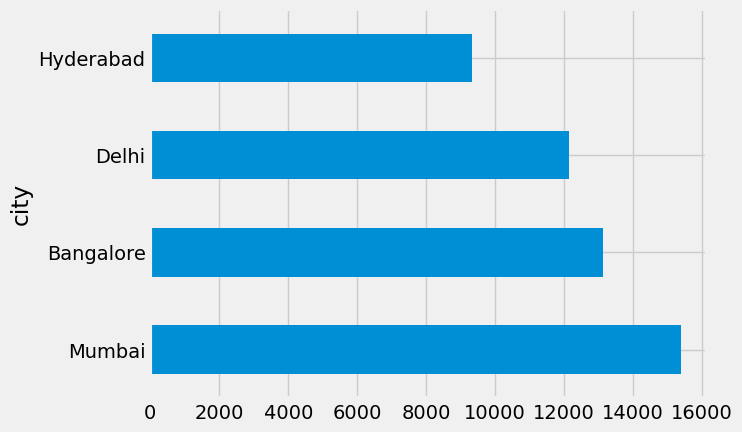

In [176]:
df_rev.groupby('city')['revenue_realized'].mean().sort_values(ascending=False).plot(kind='barh')

In [178]:
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [217]:
df_rev_by_type=pd.merge(df_bookings,df_hotels,on ='property_id')

In [294]:
df_rev_by_type.groupby('category')['revenue_realized'].sum()

category
Business     655967037
Luxury      1052569562
Name: revenue_realized, dtype: int64

<Axes: ylabel='revenue_realized'>

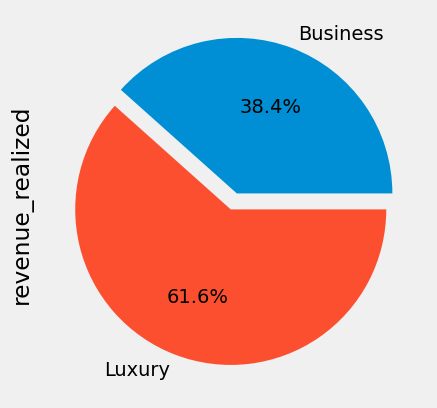

In [295]:
df_rev_by_type.groupby('category')['revenue_realized'].sum().plot(kind='pie',autopct='%1.1f%%', radius=1.0, explode=[0.07, 0.04])

In [235]:
df_rev.groupby('city')['ratings_given'].mean()

city
Bangalore    3.407681
Delhi        3.779298
Hyderabad    3.661041
Mumbai       3.650545
Name: ratings_given, dtype: float64

<Axes: xlabel='city'>

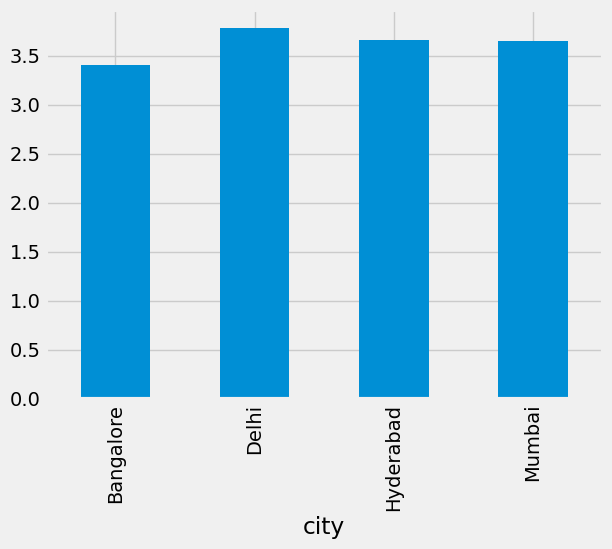

In [298]:
df_rev.groupby('city')['ratings_given'].mean().plot(kind='bar')

<Axes: xlabel='booking_platform'>

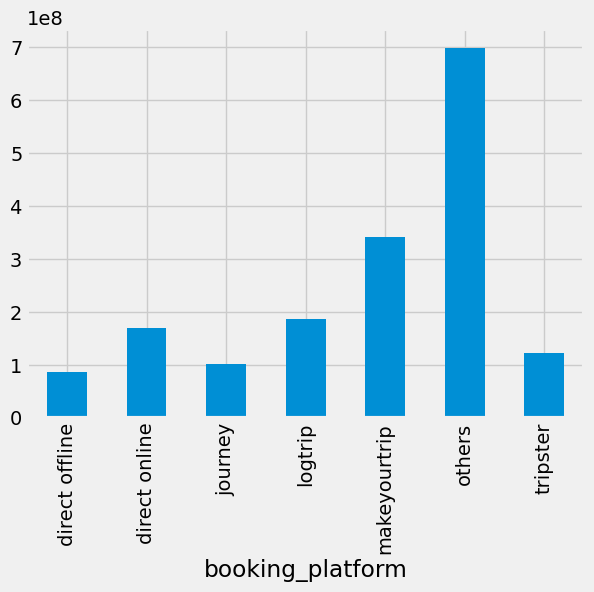

In [260]:
df_rev.groupby('booking_platform')['revenue_realized'].sum().plot(kind='bar')

In [283]:
df=pd.merge(df,df_hotels, on ='property_id')

In [285]:
df=pd.merge(df,df_date,left_on='check_in_date',right_on='date')

In [299]:
df.groupby('mmm yy')['revenue_realized'].sum()

mmm yy
Jul 22    572908208
Jun 22    553932355
May 22    581930666
Name: revenue_realized, dtype: int64